# Plotting for Research Papers: Update

## Constants

When you perform data analysis in the notebook, at first, it is important to define all necessary paths. I use two dictionaries to define them:
- **IN_PATHS** - all the paths where the input notebook data are stored
- **OUT_PATHS** - the paths where the results are stored

A key in the dictionary may have the `_dir` suffix. If a key in the dictionary has the `_dir` suffix, I know that the corresponding path should be treated as the path to a directory 

In [2]:
IN_PATHS = {
    'timeseries_file' : './input_data/timeseries.csv',
    'input_dir' : './input_data/',
}

OUT_PATHS = {
    'results_dir' : './results/csvs/',
    'figs_dir' : './results/figures/',
}


In [3]:
FIG_SIZE = (6.4, 4)
SAVE_FIG = True
FIG_FMT = 'svg'
TRANSPARENT_PNG=True

## Auxiliary Functions

In [4]:
import os
from typing import Tuple

I have an auxiliary function that checks all the paths. For each `in_paths` path, it checks if the corresponding path exists and warns a user if it does not. For each path `out_paths` path, the function creates recursively all intermediate directories. Thus, when I save data, the corresponding functions do not complain that the path is not found. 

In [5]:
def check_paths(in_paths, out_paths):
    for pth_key in in_paths:
        pth = in_paths[pth_key]
        if not os.path.exists(pth):
            print(f'Path [{pth}] does not exist')
        if pth_key.endswith('_dir') and (not os.path.isdir(pth)):
            print(f'Path [{pth}] does not correspond to a directory!')

    for pth_key in out_paths:
        pth = out_paths[pth_key]
        if pth_key.endswith('_dir'):
            abs_path = os.path.abspath(pth)
        else:
            abs_path = os.path.abspath(os.path.dirname(pth))
        if not os.path.exists(abs_path):
            print(f'Creating path: [{abs_path}]')
            os.makedirs(abs_path)

check_paths(IN_PATHS, OUT_PATHS)

Additional auxiliary function is used to store the figures. It accepts a number of arguments that control look and feel of the stored figure.

In [6]:

def save_fig(
        fig, 
        fig_name: str, 
        fig_dir: str, 
        fig_fmt: str,
        fig_size: Tuple[float, float] = [6.4, 4], 
        save: bool = True, 
        dpi: int = 300,
        transparent_png = True,
    ):
    """This procedure stores the generated matplotlib figure to the specified 
    directory with the specified name and format.

    Parameters
    ----------
    fig : [type]
        Matplotlib figure instance
    fig_name : str
        File name where the figure is saved
    fig_dir : str
        Path to the directory where the figure is saved
    fig_fmt : str
        Format of the figure, the format should be supported by matplotlib 
        (additional logic only for pdf and png formats)
    fig_size : Tuple[float, float]
        Size of the figure in inches, by default [6.4, 4] 
    save : bool, optional
        If the figure should be saved, by default True. Set it to False if you 
        do not want to override already produced figures.
    dpi : int, optional
        Dots per inch - the density for rasterized format (png), by default 300
    transparent_png : bool, optional
        If the background should be transparent for png, by default True
    """
    if not save:
        return
    
    fig.set_size_inches(fig_size, forward=False)
    fig_fmt = fig_fmt.lower()
    fig_dir = os.path.join(fig_dir, fig_fmt)
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    pth = os.path.join(
        fig_dir,
        '{}.{}'.format(fig_name, fig_fmt.lower())
    )
    if fig_fmt == 'pdf':
        metadata={
            'Creator' : '',
            'Producer': '',
            'CreationDate': None
        }
        fig.savefig(pth, bbox_inches='tight', metadata=metadata)
    elif fig_fmt == 'png':
        alpha = 0 if transparent_png else 1
        axes = fig.get_axes()
        fig.patch.set_alpha(alpha)
        for ax in axes:
            ax.patch.set_alpha(alpha)
        fig.savefig(
            pth, 
            bbox_inches='tight',
            dpi=dpi,
        )
    else:
        try:
            fig.savefig(pth, bbox_inches='tight')
        except Exception as e:
            print("Cannot save figure: {}".format(e))



from functools import partial
savefig = partial(save_fig, fig_dir=OUT_PATHS['figs_dir'], fig_fmt=FIG_FMT, fig_size=FIG_SIZE, save=SAVE_FIG, transparent_png=TRANSPARENT_PNG)

### Preprocessing and Loading Data

In [7]:
# imports
import os
import pandas as pd

In [8]:
# loading data
# got the data file from https://github.com/plotly/datasets/blob/master/timeseries.csv
ts_df = pd.read_csv(IN_PATHS['timeseries_file'])
ts_df['Date'] = pd.to_datetime(ts_df.Date)
#ts_df.info()

## Illustrative Example

In [9]:
# importing matplotlib functions
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

We use the following code to plot our data loaded into a pandas dataframe. On the `x` axis, I plot the time, while on the `y` axis I plot the values of the time series.

/tmp/ipykernel_273691/3853732959.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


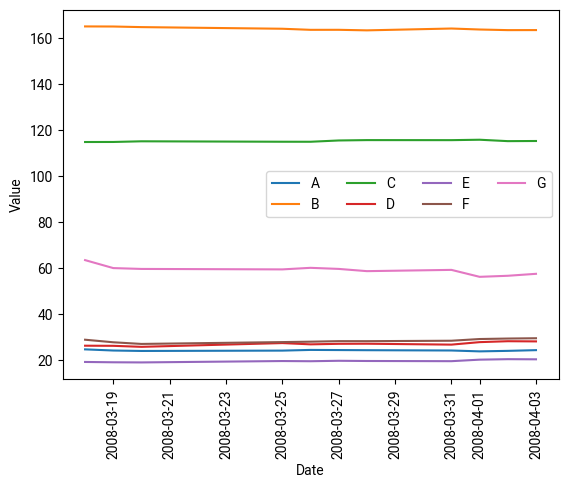

In [11]:
fig, ax = plt.subplots()
for indx, column_name in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G']):
    ax.plot(ts_df['Date'], ts_df[column_name], label=column_name)
ax.tick_params(axis='x', labelrotation = 90)
ax.set(xlabel='Date', ylabel='Value')
ax.legend(loc='center right', ncol=4)

fig.show()
# savefig(fig, 'illustrative example')

## Updates

In the previous article, we used the `plt.style.use` function to set style for the whole notebook:

```python
# for papers
plt.style.use('seaborn-paper')
# for presentations
plt.style.use('seaborn-talk')
# for papers with colors distinguishable by colorblind people
plt.style.use('seaborn-colorblind') 
# HACK: for presentations with colors distinguishable by colorblind people
plt.style.use(['seaborn-colorblind', 'seaborn-talk'])
```

### Approach 1: Old Styles Usage

Let's show how to use the old styles using `paper` as an example:

In [32]:
# for papers
# plt.style.use('seaborn-v0_8-paper')
# for presentations
# plt.style.use('seaborn-v0_8-talk')
# for papers with colors distinguishable by colorblind people
plt.style.use('seaborn-v0_8-colorblind')
# HACK: for presentations with colors distinguishable by colorblind people
# plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-talk'])

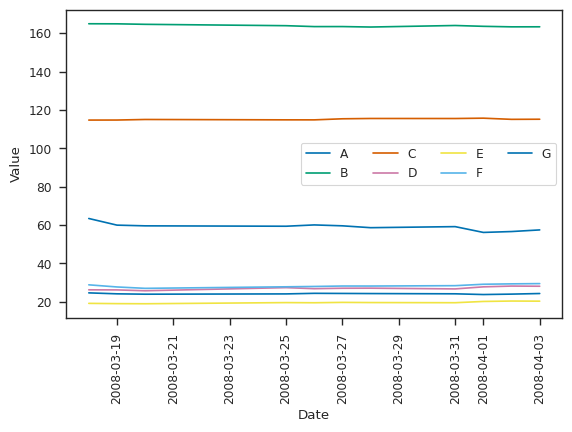

In [33]:
fig, ax = plt.subplots()
for indx, column_name in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G']):
    ax.plot(ts_df['Date'], ts_df[column_name], label=column_name)
ax.tick_params(axis='x', labelrotation = 90)
ax.set(xlabel='Date', ylabel='Value')
ax.legend(loc='center right', ncol=4)

savefig(fig, 'seaborn-v0_8-colorblind')

### Approach 2: Using Seaborn Library

In [34]:
import seaborn as sns

# seaborn options
sns.set_style('ticks') # setting style
sns.set_context('paper') # setting context
sns.set_palette('colorblind') # setting palettes

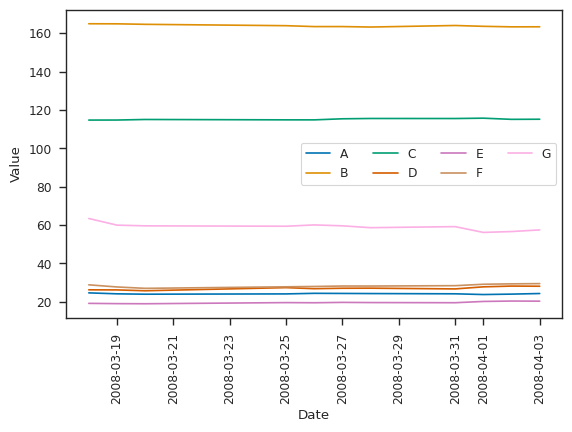

In [35]:
fig, ax = plt.subplots()
for indx, column_name in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G']):
    ax.plot(ts_df['Date'], ts_df[column_name], label=column_name)
ax.tick_params(axis='x', labelrotation = 90)
ax.set(xlabel='Date', ylabel='Value')
ax.legend(loc='center right', ncol=4)

savefig(fig, 'seaborn-paper-colorblind')

#### Setting Styles 

We can set style locally for one graph using the `sns.axes_style(style)` function.

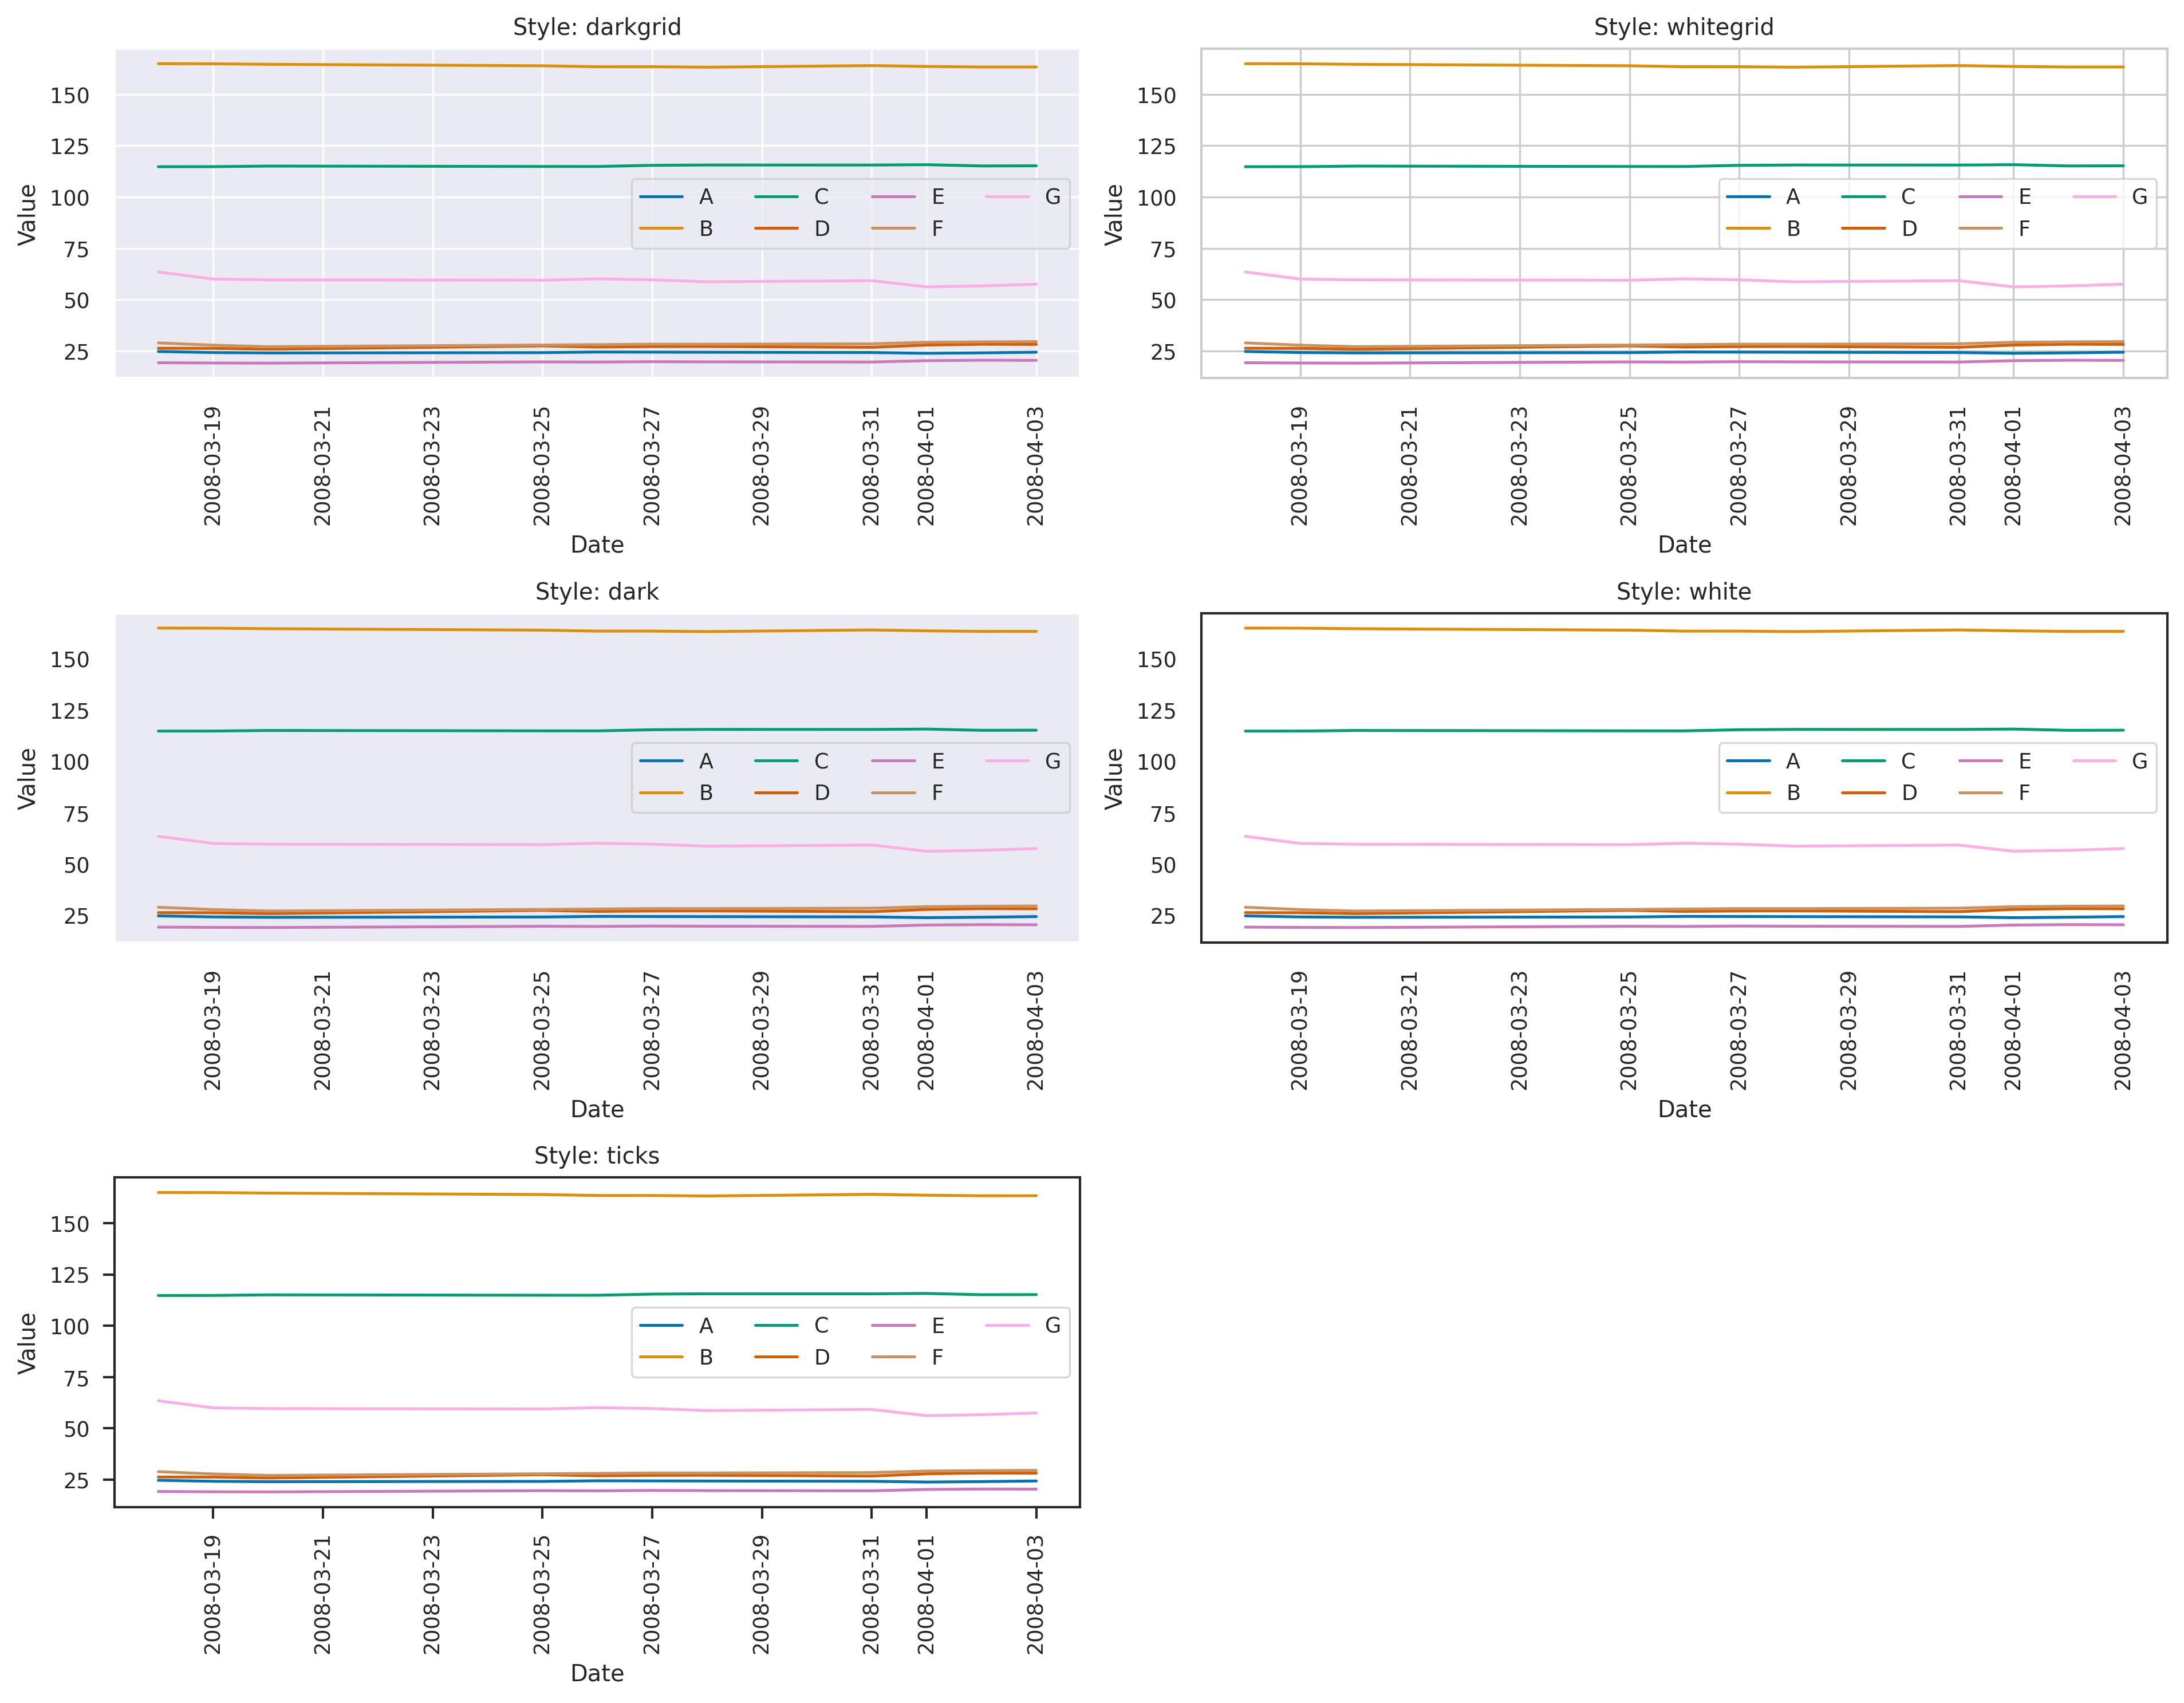

In [41]:
import math

available_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
n_styles = len(available_styles)

fig = plt.figure(dpi=300, figsize=(12.8, 4*n_styles/2), tight_layout=True)
for i, style in enumerate(available_styles):
    with sns.axes_style(style):
        ax = fig.add_subplot(math.ceil(n_styles/2.0), 2, i+1)
        for indx, column_name in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G']):
            ax.plot(ts_df['Date'], ts_df[column_name], label=column_name)
        ax.tick_params(axis='x', labelrotation = 90)
        ax.set(xlabel='Date', ylabel='Value')
        ax.legend(loc='center right', ncol=4)
        ax.set_title(f'Style: {style}')

savefig(fig, 'all-seaborn-styles', fig_size=(12.8, 4*n_styles/2))
# fig.show()

In [37]:
sns.set_style('ticks') 
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

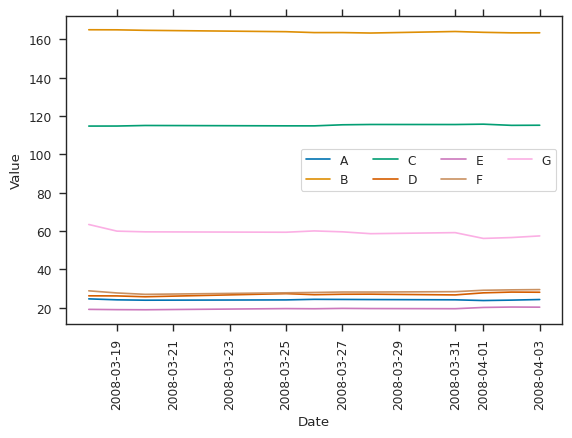

In [40]:
with sns.axes_style(style='ticks', rc={'xtick.top': True}):
    fig, ax = plt.subplots()
    for indx, column_name in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G']):
        ax.plot(ts_df['Date'], ts_df[column_name], label=column_name)
    ax.tick_params(axis='x', labelrotation = 90)
    ax.set(xlabel='Date', ylabel='Value')
    ax.legend(loc='center right', ncol=4)

savefig(fig, 'custom-style-rc')


### Setting Scaling Contexts

We can set scaling contextes for one graph using the `sns.plotting_context(context)` function.

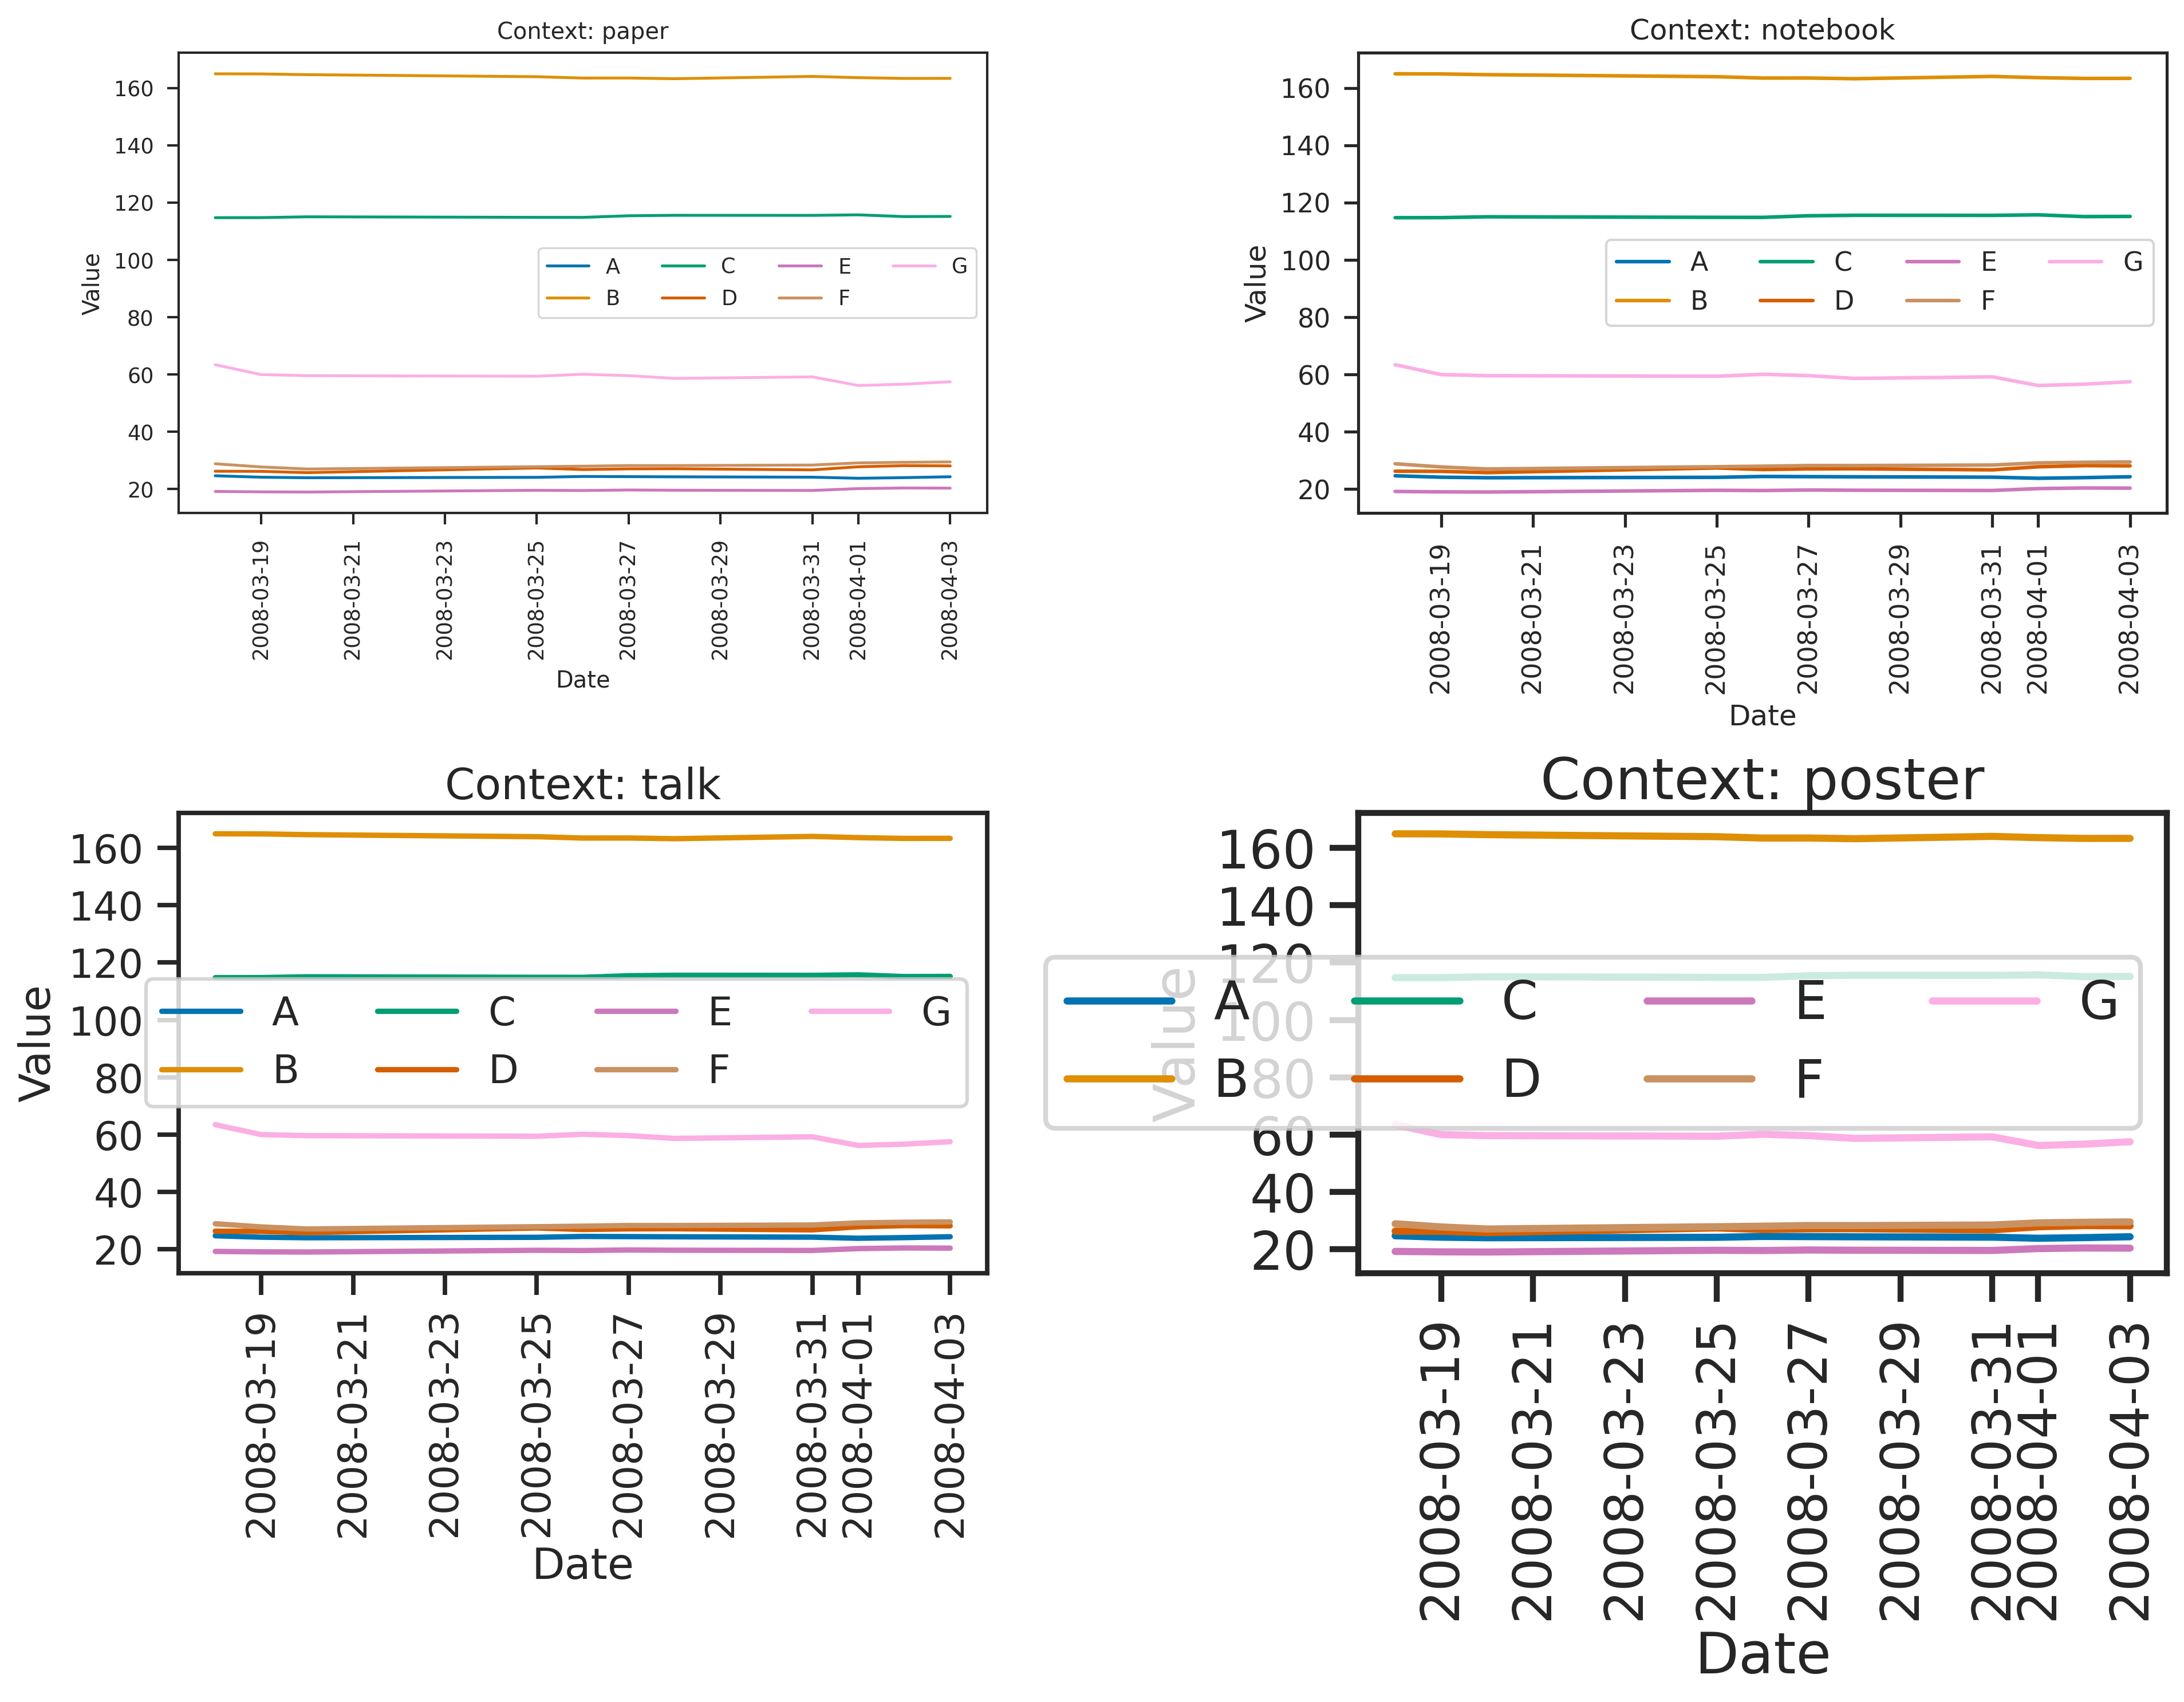

In [43]:
available_contexts = ['paper', 'notebook', 'talk', 'poster']
n_contexts = len(available_contexts)

fig = plt.figure(dpi=300, figsize=(12.8, 4*n_contexts/2), tight_layout=True)
for i, ctx in enumerate(available_contexts):
    with sns.plotting_context(ctx):
        ax = fig.add_subplot(math.ceil(n_contexts/2.0), 2, i+1)
        for indx, column_name in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G']):
            ax.plot(ts_df['Date'], ts_df[column_name], label=column_name)
        ax.tick_params(axis='x', labelrotation = 90)
        ax.set(xlabel='Date', ylabel='Value')
        ax.legend(loc='center right', ncol=4)
        ax.set_title(f'Context: {ctx}')

savefig(fig, 'all-seaborn-contexts', fig_size=(12.8, 4*n_styles/2))
# fig.show()

In [44]:
sns.set_context('notebook') 
sns.plotting_context()

{'font.size': 12.0,
 'axes.labelsize': 12.0,
 'axes.titlesize': 12.0,
 'xtick.labelsize': 11.0,
 'ytick.labelsize': 11.0,
 'legend.fontsize': 11.0,
 'legend.title_fontsize': 12.0,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0}

### Setting Color Palette

In [ ]:
To set color palette for all the graphs in the notebook, you should use `sns.set_palette` function:

In [ ]:
sns.set_palette('colorblind')

In [45]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [49]:
sns.color_palette('colorblind', n_colors=15)

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844)]

Here is the list of the predefined seaborn color palettes:

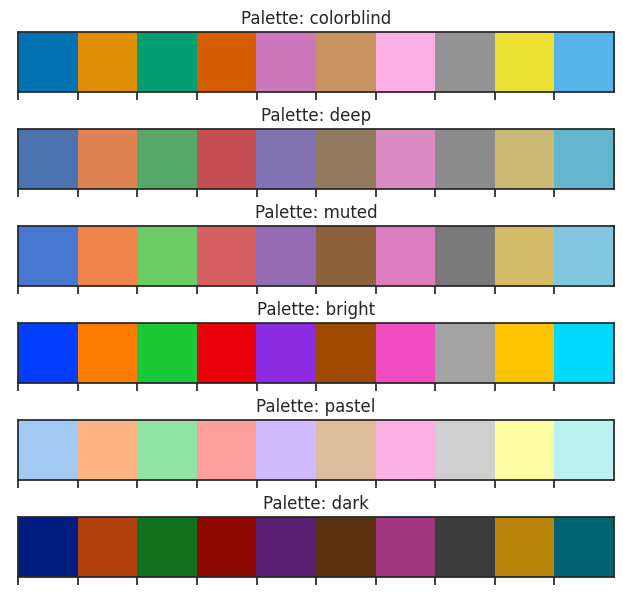

In [87]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

palettes = ['colorblind', 'deep', 'muted', 'bright', 'pastel', 'dark']
n_palettes = len(palettes)

fig = plt.figure(layout='tight', figsize=(6.4, n_palettes))
for i, pal in enumerate(palettes, start=1):
    palette = sns.color_palette(pal)
    n = len(palette)
    ax = fig.add_subplot(n_palettes, 1, i)
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(palette)),
              interpolation="nearest", aspect="equal")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    # Ensure nice border between colors
    ax.set_xticklabels(["" for _ in range(n)])
    # The proper way to set no ticks
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.set_title(f'Palette: {pal}')

savefig(fig, 'seaborn-color-palettes', fig_size=(6.4, n_palettes))
# fig.show()

The list of the predefined matplotlib color palette names can be obtained using `plt.colormaps()` function:

In [96]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

Palette jet is not available


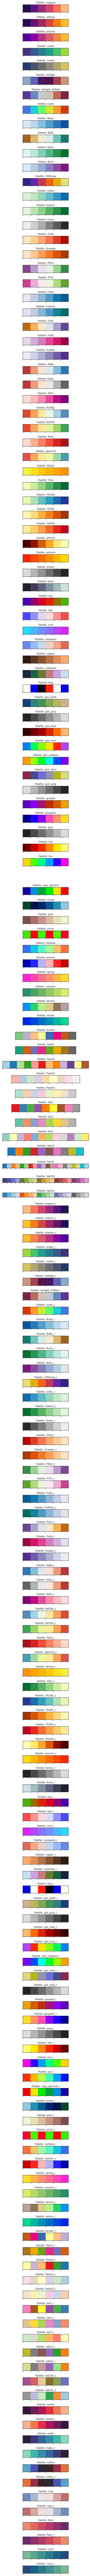

In [95]:
palettes = plt.colormaps()
n_palettes = len(palettes)

fig = plt.figure(layout='tight', figsize=(6.4, n_palettes))
for i, pal in enumerate(palettes, start=1):
    try:
        palette = sns.color_palette(pal)
        n = len(palette)
        ax = fig.add_subplot(n_palettes, 1, i)
        ax.imshow(np.arange(n).reshape(1, n),
                cmap=mpl.colors.ListedColormap(list(palette)),
                interpolation="nearest", aspect="equal")
        ax.set_xticks(np.arange(n) - .5)
        ax.set_yticks([-.5, .5])
        # Ensure nice border between colors
        ax.set_xticklabels(["" for _ in range(n)])
        # The proper way to set no ticks
        ax.yaxis.set_major_locator(ticker.NullLocator())
        ax.set_title(f'Palette: {pal}')
    except ValueError as e:
        print(f'Palette {pal} is not available')

savefig(fig, 'matplotlib-color-palettes', fig_size=(6.4, n_palettes))
# fig.show()

If you need more distinct colors, you can try to generate them using the `'hls'` or `'husl'` color schemes:

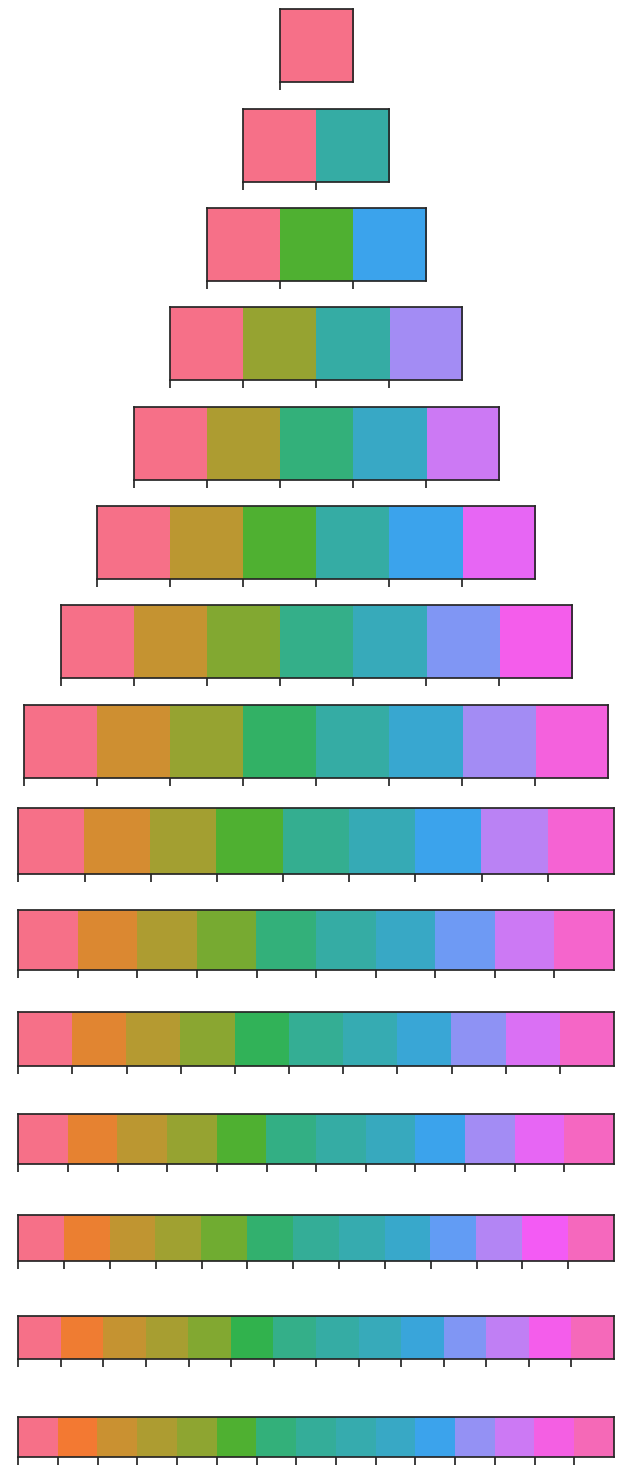

In [107]:
max_color_number = 15

fig = plt.figure(layout='tight', figsize=(6.4, max_color_number))
for i in range(1, max_color_number+1):
    palette = sns.color_palette(palette='husl', n_colors=i)
    ax = fig.add_subplot(max_color_number, 1, i)
    ax.imshow(np.arange(i).reshape(1, i),
              cmap=mpl.colors.ListedColormap(list(palette)),
              interpolation="nearest", aspect="equal")
    ax.set_xticks(np.arange(i) - .5)
    ax.set_yticks([-.5, .5])
    # Ensure nice border between colors
    ax.set_xticklabels(["" for _ in range(i)])
    # The proper way to set no ticks
    ax.yaxis.set_major_locator(ticker.NullLocator())

# fig.show()
savefig(fig, 'husl-color-palette', fig_size=(6.4, max_color_number))

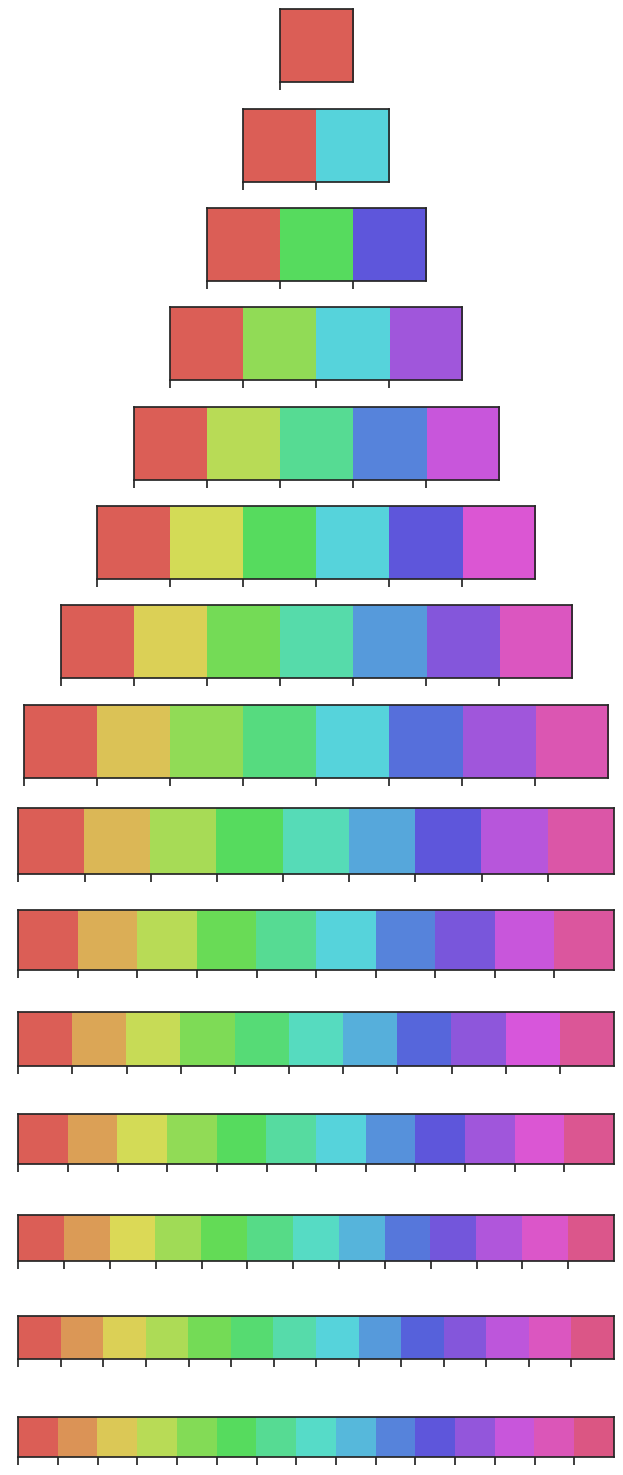

In [108]:
max_color_number = 15

fig = plt.figure(layout='tight', figsize=(6.4, max_color_number))
for i in range(1, max_color_number+1):
    palette = sns.color_palette(palette='hls', n_colors=i)
    ax = fig.add_subplot(max_color_number, 1, i)
    ax.imshow(np.arange(i).reshape(1, i),
              cmap=mpl.colors.ListedColormap(list(palette)),
              interpolation="nearest", aspect="equal")
    ax.set_xticks(np.arange(i) - .5)
    ax.set_yticks([-.5, .5])
    # Ensure nice border between colors
    ax.set_xticklabels(["" for _ in range(i)])
    # The proper way to set no ticks
    ax.yaxis.set_major_locator(ticker.NullLocator())

# fig.show()
savefig(fig, 'hls-color-palette', fig_size=(6.4, max_color_number))